In [1]:
#!!!!注意，請先執行這個區塊，依網頁指示通過授權後載入 Google 雲端硬碟, 再執行底下的程式
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Ch13 自然語言處理實戰演練 (三)：RNN 循環神經網路

#### 13.1.2 用 tf.Keras 實作 RNN

#### 載入套件

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.layers import SimpleRNN # new! 
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline

#### 設定超參數

In [5]:
# 輸出目錄名稱
output_dir = '/content/drive/MyDrive/Colab Notebooks/F1383_Sample/Ch13/model_output/rnn'  #註：請記得依你存放的位置彈性修改路徑

# 訓練
epochs = 16 # 增加訓練週期
batch_size = 128

# 詞向量空間
n_dim = 64 
n_unique_words = 10000 
max_review_length = 100 # lowered due to vanishing gradient over time
pad_type = trunc_type = 'pre'
drop_embed = 0.2 

# RNN 的循環層參數
n_rnn = 256 
drop_rnn = 0.2

# 密集層參數
# n_dense = 256
# dropout = 0.2

#### 下載資料集

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=n_unique_words)

17473536/17464789 [==============================] - 0s 0us/step


#### 資料預處理

In [6]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_test = pad_sequences(x_test, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

#### RNN 分類模型架構

In [7]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn, dropout=drop_rnn))
# model.add(Dense(n_dense, activation='relu')) 
# model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 64)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 256)               82176     
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


#### 編譯、訓練模型

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [11]:
#註：由於神經網路的初始權重參數是隨機設定的, 參雜了隨機性, 因此底下 (或您重跑一次) 的結果不會與書中完全一樣, 但模型的能力是相近的
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test), callbacks=[modelcheckpoint])

Epoch 1/16
196/196 [==============================] - 65s 323ms/step - loss: 0.6949 - accuracy: 0.5262 - val_loss: 0.6817 - val_accuracy: 0.5454
Epoch 2/16
196/196 [==============================] - 63s 320ms/step - loss: 0.6797 - accuracy: 0.5647 - val_loss: 0.6827 - val_accuracy: 0.5374
Epoch 3/16
196/196 [==============================] - 63s 324ms/step - loss: 0.6319 - accuracy: 0.6381 - val_loss: 0.6552 - val_accuracy: 0.5871
Epoch 4/16
196/196 [==============================] - 63s 320ms/step - loss: 0.6039 - accuracy: 0.6685 - val_loss: 0.6361 - val_accuracy: 0.6244
Epoch 5/16
196/196 [==============================] - 63s 322ms/step - loss: 0.5375 - accuracy: 0.7292 - val_loss: 0.5491 - val_accuracy: 0.7297
Epoch 6/16
196/196 [==============================] - 63s 320ms/step - loss: 0.4841 - accuracy: 0.7689 - val_loss: 0.5208 - val_accuracy: 0.7720
Epoch 7/16
196/196 [==============================] - 62s 319ms/step - loss: 0.4160 - accuracy: 0.8108 - val_loss: 0.5298 - val_ac

#### 評估結果

In [ ]:
model.load_weights(output_dir+"/weights.05.hdf5")  #請視以上執行結果指定較佳的權重

In [ ]:
y_hat = model.predict(x_test)

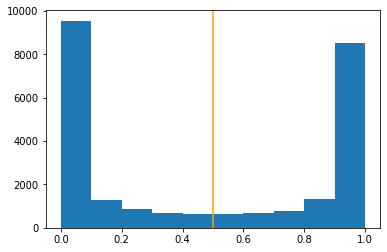

In [ ]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [ ]:
#註：由於神經網路的初始權重參數是隨機設定的, 參雜了隨機性, 因此底下 (或您重跑一次) 的結果不會與書中完全一樣, 但模型能力基本上是相近的
"{:0.2f}".format(roc_auc_score(y_test, y_hat)*100.0)

'88.36'